## Data Fruit Classifier WIth XGBoost
This notebook will be used for modelling date fruit classifier
Date fruit data was i collected from kaggle
if you want to used this data, you can go to this link:
https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets
or, you can downloaded it from ./archive in this repo :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
PATH = os.path.join("archive/Date_Fruit_Datasets/")

In [3]:
df = pd.read_excel(f"{PATH}Date_Fruit_Datasets.xlsx")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
import time
import seaborn as sns
import tensorflow as tf
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [6]:
RANDOM_STATE = 42
LR = 0.01
TEST_SIZE = 0.33
MAX_DEPTH = 0
NTHREAD = 2
EVAL_METRIC = 'mlogloss'
BOOSTER = 'gbtree'
VERBOSITY = 1

In [7]:
le = LabelEncoder()
y = le.fit_transform(df.Class)
X = df.iloc[:,:-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE, shuffle = True)

In [9]:
model = xgb.XGBClassifier(
                        random_state=RANDOM_STATE,
                        learning_rate=LR,
                        booster=BOOSTER,
                        nthread=NTHREAD,
                        eval_metric=EVAL_METRIC,
                        verbosity=VERBOSITY
                        )

In [10]:
# Calcualate model fitting time to our train data
start = time.time()

model.fit(X,y)

end = time.time()

print("Training took {} seconds".format(round(end - start, 2)))

Training took 4.86 seconds


In [11]:
predict = model.predict(X_test)

acc = accuracy_score(predict, y_test)

print("Accuracy score our model to test set : {}".format(acc))

Accuracy score our model to test set : 0.98989898989899


In [12]:
#calculate recall score, f1 score
recallScore = recall_score(y_test, predict, average = 'macro')
f1Score = f1_score(predict, y_test, average = 'macro')

print("f1 Score : {} \nrecall score : {}".format(f1Score, recallScore))

f1 Score : 0.985485554821423 
recall score : 0.9851308112177677


In [13]:
xticks = []
for i in df.Class.unique():
    xticks.append(i)
    
xticks
    

['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY']

Text(0.5, 1.0, 'Confusion Matrix')

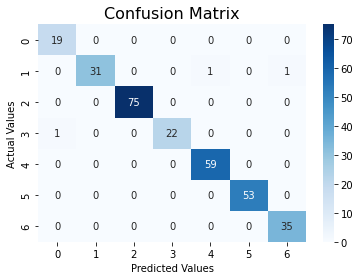

In [14]:
#Declared some metrics model
confusion_matrix = confusion_matrix(y_test, predict)
cm_plot = sns.heatmap(confusion_matrix,
                      annot=True, 
                      cmap='Blues',
                      fmt='d');

cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix', size=16)